# Masterclass Belle II

In diesem *jupyter*-notebook werden dir die Grundlagen für die Rekonstruktion von Teilchen erklärt. Das ganze ist in *python(3)* programmiert und interaktiv gestaltet.

---

---
# Inhalt <a id='Inhalt'> </a>
## 1. [Grundlegendes](#Sec:basics)
### 1.1 [Was ist *jupyter*?](#SubSec:jupyter)
### 1.2 [Was ist *python*?](#SubSec:python)
### 1.3 [Notebook aufsetzen](#SubSec:notebook)
## 2. [Das Belle II Experiment](#Sec:belleII)
### 2.1 [Der Beschleuniger](#SubSec:accelerator)
### 2.2 [Der Detektor](#SubSec:detector)
### 2.3 [Vereinfachter Detektor](#SubSec:toydetector)
## 3. [Der Spurdetektor](#Sec:tracking)
### 3.1 [Testdetektor](#SubSec:testdetector)
### 3.2 [Detektor Rauschen](#SubSec:noise)
### 3.3 [Spurrekonstruktion](#SubSec:trackfinding)
## 4. [ECL](#Sec:ECL)

---
# 1. Grundlegendes <a id='Sec:basics'> </a> [^](#Inhalt)
---
## 1.1 Was ist *jupyter*? <a id='SubSec:jupyter'> </a>
---

Die Umgebung, in der du hier arbeitest, wird als *jupyter* notebook bezeichnet. *jupyter notebooks*
sind Dateien vom Typ *.ipynb*, die sowohl erklärenden Text als auch Anweisungen für den Computer
enthält. *jupyter* bietet eine Browser-Schnittstelle mit einer (einfachen) Entwicklungsumgebung für 
Anweisungen in der Sprache *python* und erklärende Texte im intuitiven *markdown*-Format. Die 
Eingabe von Formeln im *LaTeX*-Format zur komfortablen und grafisch ansprechenden Gestaltung von 
Formeln wird ebenfalls unterstützt. 

Die *jupyter*-Oberfläche lässt sich zwar komplett mit der Maus bedienen, viel effizienter ist
es allerdings, nach einiger Eingewöhnung die Tastatur zu benuzten. Eine kleine Liste an 
Tastenkürzeln (genannt "*jupyter*-Shortcuts") ist hier - als Tabelle im *markdown*-Format:

 Modus            | Befehl            | Aktion                                      |
:-----------------|:------------------|:--------------------------------------------|
**A**llgemein     | `esc`             | verlässt Editiermodus                       |
  A               | `enter`           | geht in Editiermodus                        |                       
**E**ditiermodus  | `shift` + `enter` | führt Zelle aus und geht zur nächsten       |
  E               | `ctrl` + `enter`  | führt Zelle aus                             |


Durch Doppelklick in diese Zelle siehst du den eingegebenen Text, wenn du `shift` + `enter`
eingibst, wird die Zelle formatiert und du siehst eine schön gesetzte Tabelle. 
Für die Interaktiven Widgets bitte immer die entsprechende Zeile mit `ctrl` + `enter` ausführen. 

---
## 1.2 Was ist *python*? <a id='SubSec:python'> </a>
---

> Python $[...]$ ist eine universelle, üblicherweise interpretierte, höhere Programmiersprache.
[Wikipedia](https://de.wikipedia.org/wiki/Python_(Programmiersprache))

Für diejenigen, die bereits eine Programmiersprache kennen, ist dieser Ausdruck beinahe ausreichend zur Erklärung. Schön wäre noch zu wissen, dass *python* auf allen gängigen Betriebssystemen kostenlos verfügbar ist und dass *python* erst durch den Einsatz der großen Zahl verfügbarer Module mit einem enormen Funktionsumfang wirklich mächtig wird. Das reicht bis zum Einsatz in Bereich "Data Science" und
"Deep Learning" (für diejenigen, die Buzzwords mögen ...), oder wissenschaftlicher ausgedrückt: im
Bereich der multivariaten Datenauswertung. 

*python* ist dabei besonders **einsteigerfreundlich**. Das klassische $\texttt{Hello World!}$, das am Anfang einer jeden Programmiersprache gezeigt wird, kann wie folgt ausgegeben werden.

In [3]:
print("Hello World!")

Hello World!


Das Notebook hier ist in *python* programmiert und interaktiv gestaltet, so dass du nichts programmieren musst. Falls etwas nicht funktionieren sollte, frage bitte einfach nach.

---
## 1.3 Notebook aufsetzen <a id='Sec:notebook'> </a> 
---

Im folgenden werden Funktionen importiert die für dieses Notebook notwendig sind. widgets und matplotlib werden für die Visualisierung verwendet und machen ein interaktives Notebook möglich. In `src` sind von uns geschrieben Funktionen, die für die particles, tracker oder visualisierung verwendet werden. 

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from src.particle import *
from src.tracker import *
from src.widgets import *
import warnings
warnings.filterwarnings('ignore')

---
# 2. Das Belle II Experiment <a id='Sec:belleII'> </a>
---
## 2.1 Der Beschleuniger <a id='SubSec:accelerator'> </a>
---
Hier nochmal kurz eine Zusammenfassung von dem Vortrag den du gerade eben gehört hast. 
Beschleuniger 
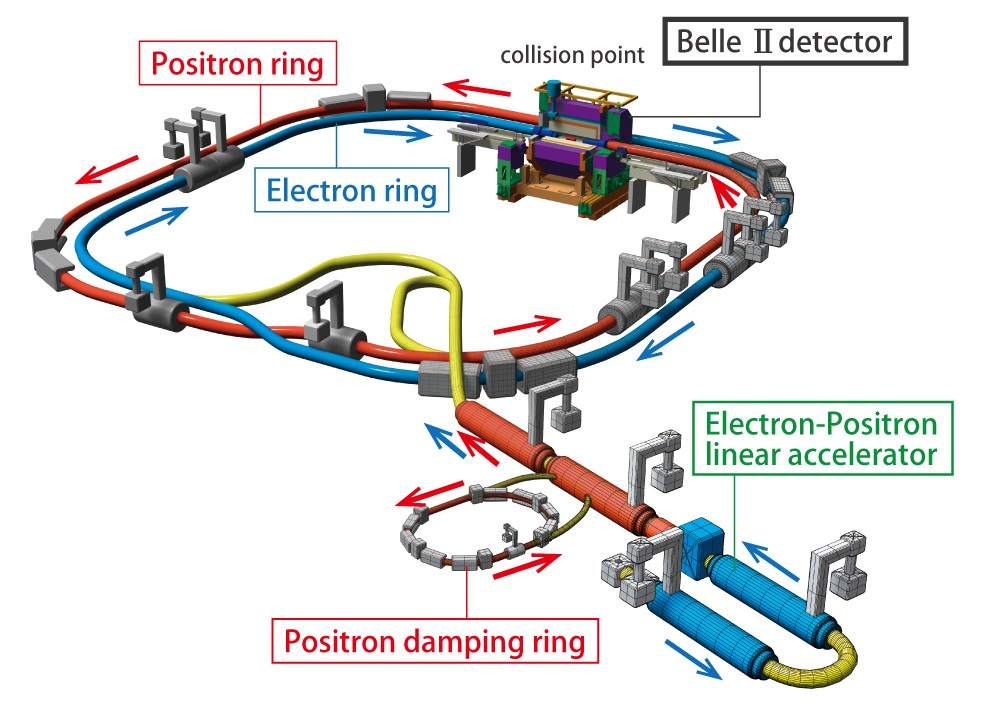

---
## 2.2 Der Detektor <a id='SubSec:detector'> </a>
---
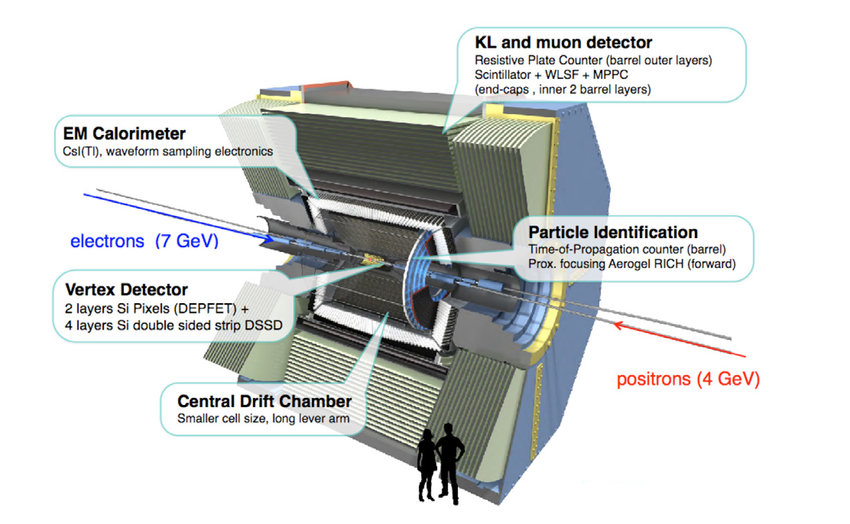

---
## 2.3 Vereinfachter Detektoraufbau <a id='SubSec:toy detector'> </a>
---
Vereinfachte Ansicht des Detektors bestehend aus Spurdetektor und Kalorimeter in der x-y Ebene, auch transversale Ebene genannt. Sie ist parallel zur Strahllinie. Der Kollisionspunkt der beiden Strahlen ist in der Mitte. Der Detektor hier besteht aus einem Spurdetektor, einem elektromagnetischen Kalorimeter und einem Magneten. Im nächsten Abschnitt wird der Spurdetektor erklärt und wie man damit die Spuren der Teilchen rekonstruiert.
<div>
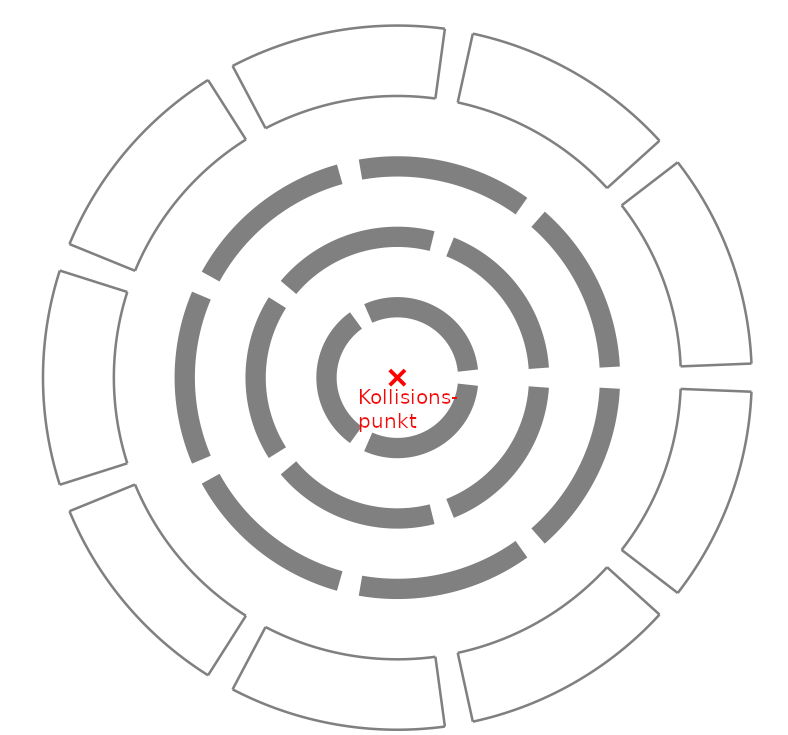
</div>

---
# 3. Spurdetektor <a id='Sec:tracking'> </a>
---
Der Spurdetektor ist im inneren des Detektors, um den Kollisionspunkt herum. Hier ist es wichtig, dass der Detektor in alle Richtungen abgedeckt ist da Teilchen in verschiedene Richtungen fliegen können. Wie der Name sagt ist dieser Detektor dafür da, die Spuren der Teilchen zu vermessen. Dieser Spurdetektor hier besteht aus 3 Schichten, also 3 Kreise auf denen die Detektorsegmente angeordnet sind. In der ersten Schicht sind es 3, in der zweiten Schicht sind es 5 und in der dritten Schicht 7 Segmente.


<div>
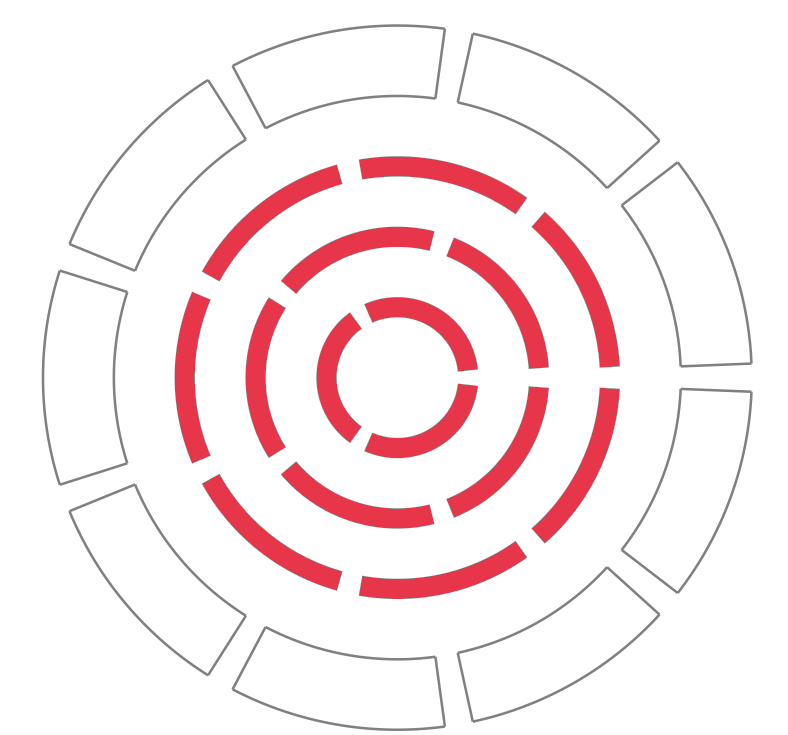
</div>


Wenn ein Teilchen durch ein Detektorsegment fliegt, kann es mit diesem Interagieren und hinterlässt einen "Hit". Dieser Hit kann beispielsweise einen Stromimpuls sein, für uns reicht es erstmal dass wir in diesem Detektorsegment etwas messen, also wir detektieren etwas.
Wenn jetzt ein Teilchen bei der Kollision entsteht und nach außen fliegt, fliegt es durch die einzelnen Segmente des Detektors.

Wie bei einem Foto können wir uns jetzt anschauen welche Deteektorsegmente etwas detektiert haben und uns  auf diese Weise überlegen welche Bahn das Teilchen genommen hat.
Wenn du den Testdetektor in 3.1 ausführst, siehst du ein interaktives Fenster mit dem Detektor. 
Das Teilchen geht vom Kollisionspunkt aus gerade nach oben und durch 3 Detektorsegmente des Spurdetektor, die deshalb grün leuchten weil sie einen "Hit" gemessen haben.

Wie zuvor in den Vorträgen erwähnt, legen wir jetzt zusätzlich dazu noch ein Magnetfeld an. Mithilfe der Lorenztkraft werden die geladenen Teilchen daraufhin auf eine Kreisbahn abgelenkt.

$F_L=q \cdot (\vec{v} \times \vec{B} )$

Das ganze können wir jetzt mit der Zentripetalkraft gleichsetzen.

$F_z=m \cdot \frac{\vec{v}^2}{r}$.

$F_L = F_z$
 
Umgestellt nach dem Impuls ergibt sich:
$p=m \cdot v =r \cdot q \cdot B$

Das heißt wir können anhand des Radius der Teilchenbahn den Impuls bestimmen und anhand der Richtung der Krümmung die Ladung bestimmen.
Unten in 3.1, in dem  interaktiven Fenster hast du einen Regler für den Impuls in der transversalen Ebene $p_t$, also in x-y Ebene und für das Magnetfeld $B$. Wenn du den Impuls erhöhst und kein Magnetfeld anliegt, also $B$ auf 0 gestellt ist, ist die Teilchenspur für alle einstellbaren Impulse gleich. Schaltest du jetzt das Magnetfeld an, dann wird die Teilchenspur gekrümmt da die geladenen Teilchen auf die Kreisbahn abgelenkt werden. Diese Krümmung hängt von der stärke des Magnetfeldes ab. Hast du dich für einen Wert festgelegt, siehst du dass je höher der Impuls der Teilchen ist, desto geringer ist die Krümmung. Wenn du jetzt die Ladung zu einer positiven Ladung wechselst siehst du dass die Krümmung in die andere Richtung geht. Auf diese Weise kann die Ladung bestimmt werden.

---
## 3.1 Testdetektor <a id='SubSec:testdetector'> </a>
---

Output()

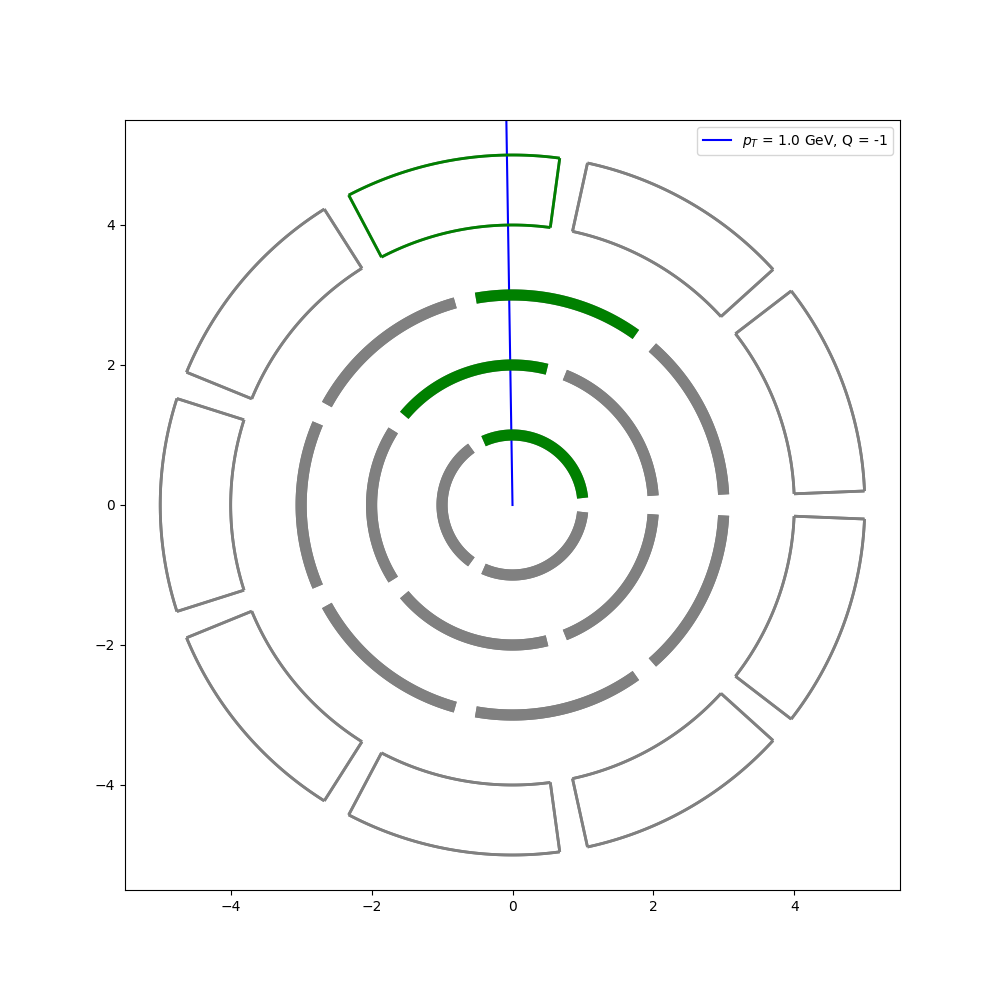

In [2]:
# ausführen für den Testdetektor
tw=ptWidget( nlayers=4, axlim=[-5.5,5.5])
tw.show()

Vielleicht ist dir schon aufgefallen, das manchmal die Teilchenspur zwischen den Detektorsegmenten durchgeht. In diesem Fall kann nichts gemessen werden für diesen Detektorkreis. Du kannst in dem oberen Feld mal den Impuls des Teilchens auf $p_t=1.5$ stellen und das Magnetfeld $B=3$. Der dritte Detektorkreis kann in diesem Fall nichts messen. Das liegt daran, dass die Abdeckung nicht perfekt ist, der Messsensor muss ja irgendwie auf die Kreisbahn befestigt werden und deshalb ist drum herum noch Platz. Wenn ein Teilchen da durch fliegt können wir es leider deshalb nicht detektieren. Das ist auch der Grund warum die Segmente gegeneinander verschoben sind, damit wir selbst wenn ein Detektorkreis ausfällt immerhin die umliegenden messen können.

Eine weiter Sache die dir vielleicht schon aufgefallen ist: wenn du beispielsweise das Magnetfeld auf $B=2$ stellst dann kriegst du für einen Impuls von $p_t=1.7$ und $p_t=3.7$ genau das gleiche Bild was detektiert wurde. Das liegt daran dass es momentan in unserem Aufbau sehr wenig Detektorsegmente gibt und wir haben deshalb eine schlechte Auflösung (quasi wie bei 140p, wir können das Bild nicht gut erkennen). 

Das kannst du dir wie bei deinem Lineal vorstellen, das Milimeter striche hat. Wenn du eine 2.4 mm langen Strich zeichnen müsstest wäre das deutlich erschwert für dich weil dein Lineal nicht genauer ist. Genauso funktioniert das mit den Detektorsegmenten.

Eine Lösung dafür ist mehr Detektorsegmente zu machen. Diese sind allerdings teuer und müssen ja auch irgendwie im Detektor festgemacht werden, d.h. wir haben mehr Zwischenräume in denen wir nichts messen können oder brauchen sehr viel Platz weil der Detektor sehr groß wird. Wir müssen also einen Kompromiss finden wenn wir den Detektor bauen. 

Du kannst das ganze jetzt nochmal mit einem größeren Detektor probieren in dem folgenden Feld, für die gleichen Einstellungen. Die Anzahl der Schichten wird hier auf 8 erhöht, wodurch der Detektor auch deutlich größer ist. Die Auflösung ist jetzt deutlich besser.

Output()

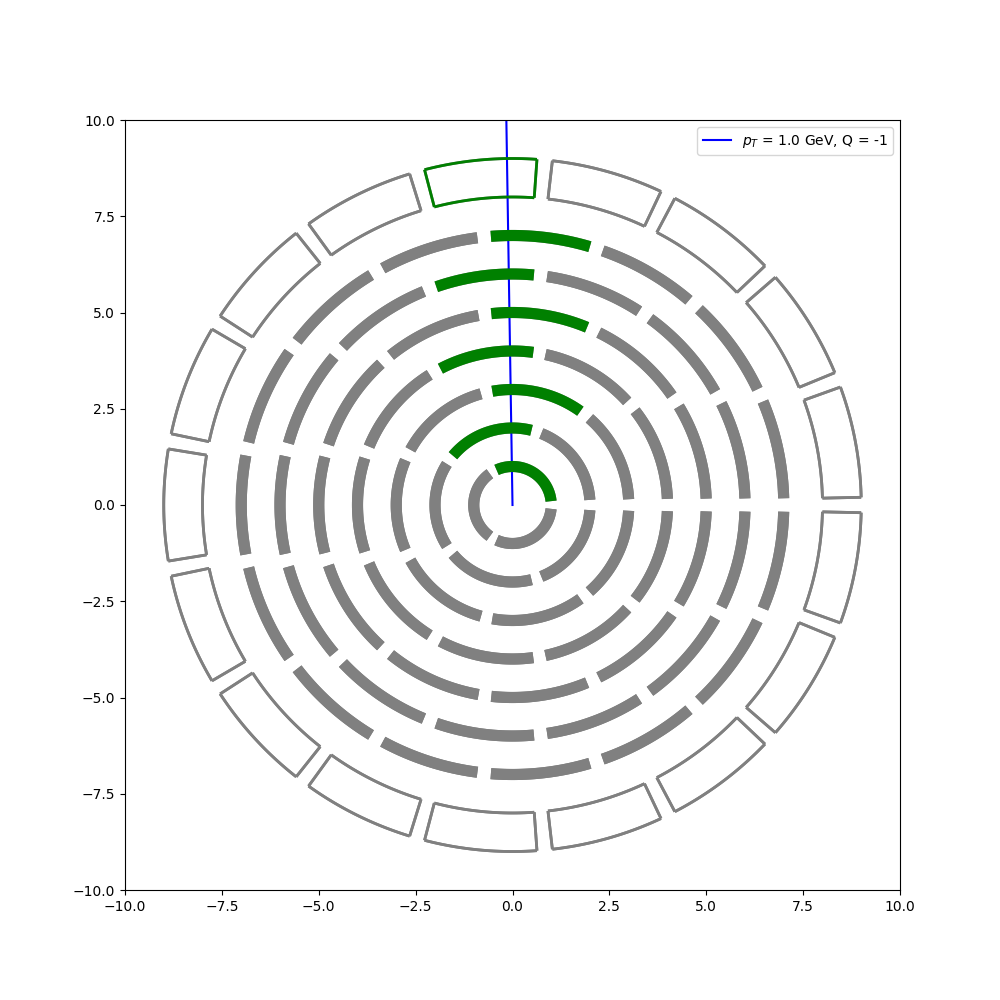

In [3]:
tw=ptWidget(nlayers=8, axlim=[-10,10])
tw.show()

---
## 3.2 Detektorrauschen <a id='SubSec:noise'> </a>
---
Vielleicht kennst du Bildrauschen schon wenn du ein Foto machst. Manchmal sind darauf komische Effekte wie Körnung oder änliches, was in Wahrheit gar nicht da ist.

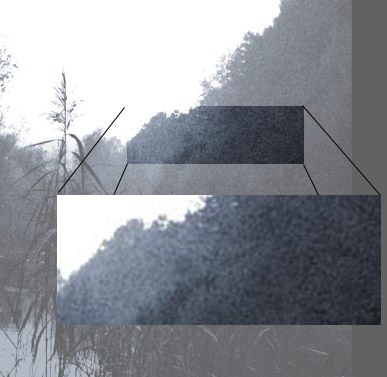

Genau das gleiche kann auch hier bei dem Spurdetektor passieren. So wie bei dem Kamerasensor ein Element auf einmal etwas anzeigt was es gar nicht gemessen hat, kann auch hier ein elektrischer Impuls entstehen ohne dass ein Teilchen von unserer Kollision durch das Detektorsegment ist. Dies erschwert es uns natürlich die Teilchenspuren zu finden.

Hier siehst du ein Beispiel von Detektorrauschen. Auf der linken Seite sind die Hits die von dem Teilchen, das in der Kollision entstanden ist, grün eingefärbt und das Detektorrauschen rot. Allerdings ist das einzige was man sieht die Aufnahme, das heißt das Bild auf der rechten Seite. Es ist nun deutlich schwerer zu unterscheiden welche Hits zu dem Teilche gehören und welche einfach nur Rauschen sind.
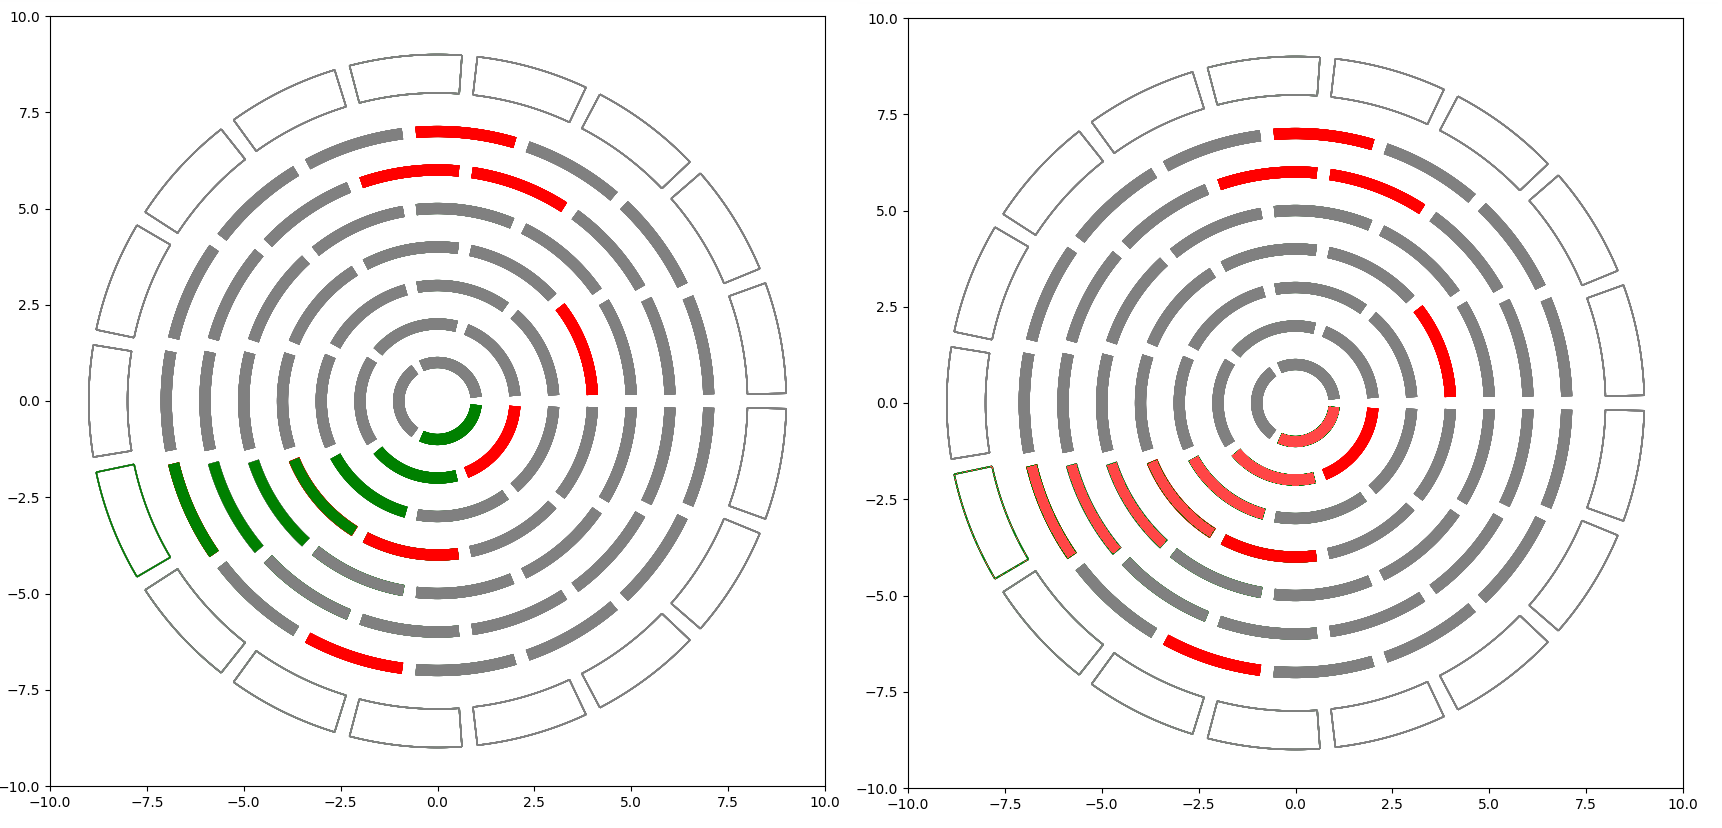

---
## 3.3 Spur-Rekonstruktion <a id='SubSec:trackfinding'> </a>
---
Du kannst das ganze jetzt einmal ausprobieren mit einer Beispielsspur. Dafür laden wir zuerst die Daten und du kannst daraufhin versuchen den Impuls und die Ladung zu bestimmen. Was ist die Ladung und der Impuls $p_t$ des Teilchens?

Output()

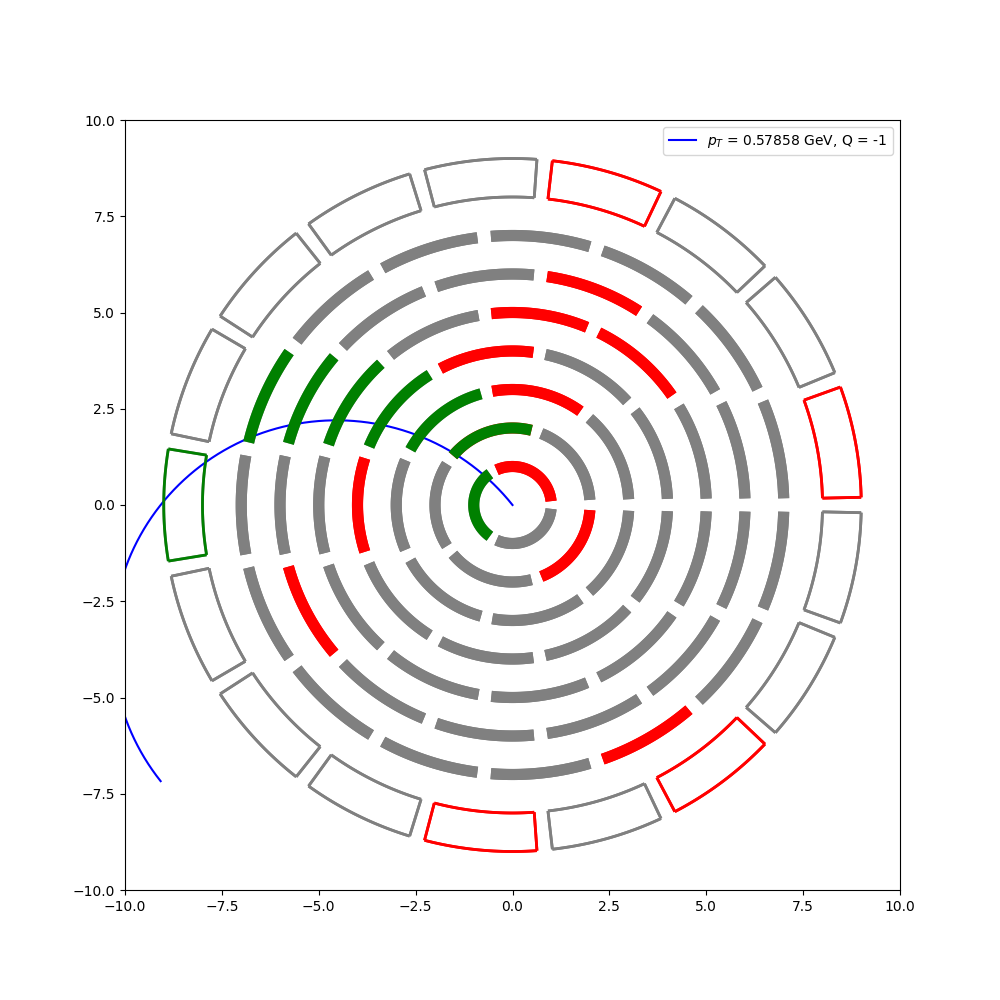

In [13]:
tw=TrackingWidget('events/single_track.h5')
tw.show()

---
# 4. Elektromagnetisches Kalorimeter <a id='SubSec:ECL'> </a>
---
Die äußere Schicht ist das elektromagnetische Kalorimeter auch ECL genannt.
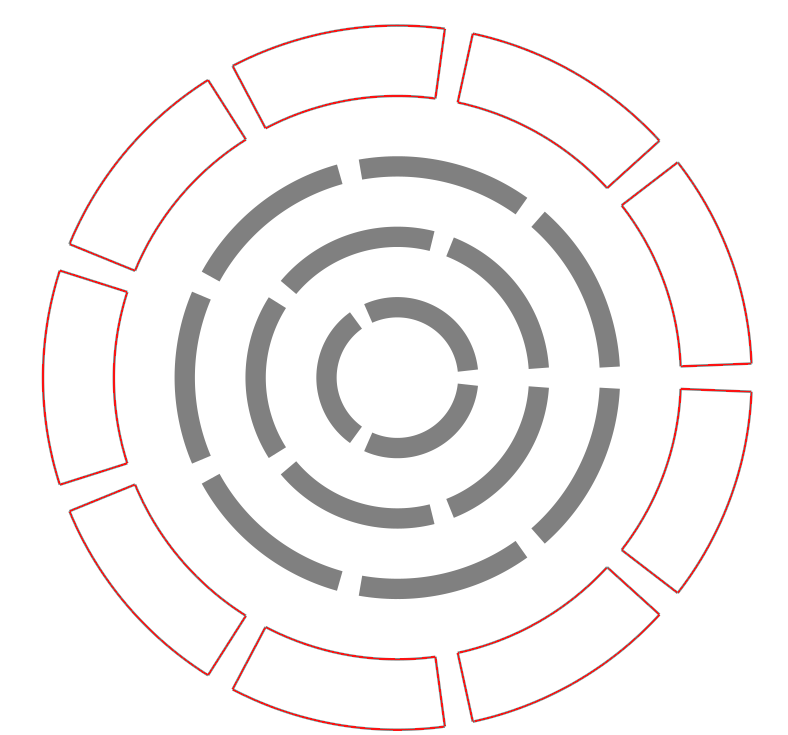